# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
 ! git clone https://www.github.com/DS3001/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 29 (delta 2), reused 3 (delta 1), pack-reused 21 (from 1)
Unpacking objects: 100% (29/29), done.


**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups. 
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

In [3]:
ls the_bootstrap/data

cpr.csv                        mammogram.csv
cpr.txt                        mammogram.txt
diabetes_hw.csv                mn_police_use_of_force.csv
gender_discrimination.csv      pierce_county_house_sales.csv
gender_discrimination.txt      pretrial_data.csv
heart_hw.csv                   use_of_force.txt


In [6]:
mam_df = pd.read_csv("./the_bootstrap/data/mammogram.csv")

In [7]:
mam_df.head()

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


1.) Cross tabulate treatment and breast_cancer_death. What is the difference in 25-year survival rates between the control and mammogram groups?

In [9]:
pd.crosstab(mam_df['treatment'], mam_df['breast_cancer_death'])

breast_cancer_death,no,yes
treatment,,
control,44405,505
mammogram,44425,500


There is little to no difference in the 25-year survival rates between the control and mammogram groups.

2.) Bootstrap the densities and distributions of survival rates for the two groups.

In [12]:
mam_df['survive'] = 0

In [13]:
mam_df.loc[mam_df['breast_cancer_death'] == 'no', 'survive'] = 1

In [14]:
df_treat = mam_df.loc[mam_df['treatment'] == 'mammogram', :]

In [15]:
df_control = mam_df.loc[mam_df['treatment'] == 'control', :]

In [21]:
# Simulation:
S = 1000
fx = []

# Bootstrapping:
for s in range(S):
    df_treat_t = df_treat.sample(df_treat.shape[0],axis=0,replace=True) # Resample treatment
    df_control_t = df_control.sample(df_control.shape[0],axis=0,replace=True) # Resample men
    treatment_effect = np.mean(df_treat_t['survive']) - np.mean(df_control_t['survive'])
    fx.append(treatment_effect)

3.) Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?

In [23]:
level = 0.99
lower  = np.quantile(fx, 0.005)
upper = np.quantile(fx, 0.995)

print('99% confidence interval: (', lower, ', ', upper, ')' )

99% confidence interval: ( -0.0017551563895738076 ,  0.0018520732059556428 )


Yes, this interval does include 0 because the lower bound is negative and the upper bound is positive.

4.) We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

These data may over or underestimate the conclusions we have reached because the decision to get a mammogram does not necessarily determine the path that a person uses to treat the cancer, which likely has a much higher effect on the patient's survival rate. Therefore, I would also like to have a patient's treatment decision to better understand the patient survival data.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

In [28]:
data = pd.read_csv("./the_bootstrap/data/diabetes_hw.csv")

In [29]:
data.head()

,Unnamed: 0,treatment,outcome
0,1,met,success
1,2,rosi,failure
2,3,rosi,success
3,4,lifestyle,success
4,5,met,success


1.) Cross tabulate treatment and outcome

In [43]:
data['success'] = 0
data.loc[data['outcome']=='success','success'] = 1
pd.crosstab(data['treatment'], data['outcome'])

outcome,failure,success
treatment,,
lifestyle,109,125
met,120,112
rosi,90,143


2.) Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?

In [35]:
success_lifestyle = 125/(109+125)
print(f"The proportion of success for the lifestlye treatment is: {success_lifestyle}")

The proportion of success for the lifestlye treatment is: 0.5341880341880342


In [36]:
success_met = 112/(120+112)
print(f"The proportion of success for the met treatment is: {success_met}")

The proportion of success for the met treatment is: 0.4827586206896552


In [39]:
success_rosi = 143/(90+143)
print(f"The proportion of success for the rosi treatment is: {success_rosi}, making it the most successful.")

The proportion of success for the rosi treatment is: 0.6137339055793991, making it the most successful.


3.) Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped by treatment type. Which treatment appears to be the most effective?

In [45]:
df_lif = data.loc[data['treatment'] == 'lifestyle', :]
df_met = data.loc[data['treatment'] == 'met', :]
df_rosi = data.loc[data['treatment'] == 'rosi', :]

In [46]:
S = 1000
fx_lif = []
fx_met = []
fx_rosi = []

In [52]:
for t in range(S):
    df_lif_t = df_lif.sample(df_lif.shape[0],axis=0,replace=True) # Resample lif
    df_met_t = df_met.sample(df_met.shape[0],axis=0,replace=True) # Resample met
    df_rosi_t = df_rosi.sample(df_rosi.shape[0],axis=0,replace=True) # Resample rosi
    
    fx_lif_t = np.mean(df_lif_t['success'])
    fx_met_t = np.mean(df_met_t['success'])
    fx_rosi_t = np.mean(df_rosi_t['success'])

    fx_lif.append(fx_lif_t)
    fx_met.append(fx_met_t)
    fx_rosi.append(fx_rosi_t)

In [54]:
gdf_lif = pd.DataFrame({'value':fx_lif, 'intervention':'lifestyle'}) 
gdf_rosi = pd.DataFrame({'value':fx_rosi, 'intervention':'rosi'})
gdf_met = pd.DataFrame({'value':fx_met, 'intervention':'met'})
gdf = pd.concat([gdf_lif, gdf_rosi, gdf_met], axis=0)

In [56]:
gdf

,value,intervention
0,0.547009,lifestyle
1,0.495726,lifestyle
2,0.547009,lifestyle
3,0.504274,lifestyle
4,0.474359,lifestyle
...,...,...
1995,0.521552,met
1996,0.405172,met
1997,0.504310,met
1998,0.508621,met


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

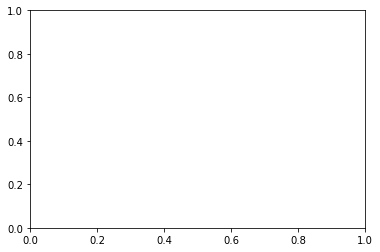

In [61]:
sns.kdeplot(data=gdf, x='value', hue = 'intervention')
plt.show()

sns.ecdfplot(data=gdf, x='value', hue = 'intervention')
plt.show()

I am unsure what is going wrong here.

4.) For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

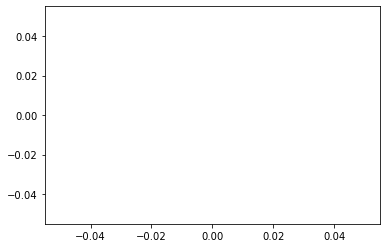

In [62]:
rosi_vs_life = np.array(fx_rosi) - np.array(fx_lif)
sns.kdeplot(x=rosi_vs_life)
plt.show()
'''
Again unsure why the kde plots are not working for me
'''

In [66]:
print('90% Confidence interval, rosi minus lifestyle: ', np.quantile(rosi_vs_life,.05), ', ', np.quantile(rosi_vs_life,.95))

90% Confidence interval, rosi minus lifestyle:  0.0 ,  0.13522981548732627


In [67]:
rosi_vs_met = np.array(fx_rosi) - np.array(fx_met)
print('90% Confidence interval, rosi minus met: ', np.quantile(rosi_vs_met,.05), ', ', np.quantile(rosi_vs_met,.95))

90% Confidence interval, rosi minus met:  0.0 ,  0.19119061713778307


In [68]:
life_vs_met = np.array(fx_lif) - np.array(fx_met)
print('90% Confidence interval, lif minus met: ', np.quantile(life_vs_met,.05), ', ', np.quantile(life_vs_met,.95))

90% Confidence interval, lif minus met:  -0.004385867963454254 ,  0.11155319776009431


5.) Which treatment appears to be the most effective overall?

There does appear to be any statistcally significant benefit of any of the treatments over another because all of the confidence intervals include the value 0.

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?